In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

# Part 1: Data Preprocessing

In [5]:
# Check for missing values
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Fill missing values
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Columns to check for outliers
numeric_columns = ["housing_median_age", "total_rooms", "total_bedrooms", 
                   "population", "households", "median_income", "median_house_value"]

# Detect outliers
outlier_counts = detect_outliers_iqr(df, numeric_columns)

# Print outlier counts
print("Outlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Outlier counts per column:
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 1306 outliers
population: 1196 outliers
households: 1220 outliers
median_income: 681 outliers
median_house_value: 1071 outliers


In [10]:
# Function to cap outliers using IQR
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers for selected columns
columns_to_cap = ["total_rooms", "total_bedrooms", "population", 
                  "households", "median_income", "median_house_value"]

df = cap_outliers(df, columns_to_cap)

# Check new statistics
print(df[columns_to_cap].describe())


        total_rooms  total_bedrooms    population    households  \
count  20640.000000    20640.000000  20640.000000  20640.000000   
mean    2441.692472      501.182086   1336.959012    469.020107   
std     1397.790038      284.133641    765.550830    265.507540   
min        2.000000        1.000000      3.000000      1.000000   
25%     1447.750000      297.000000    787.000000    280.000000   
50%     2127.000000      435.000000   1166.000000    409.000000   
75%     3148.000000      643.250000   1725.000000    605.000000   
max     5698.375000     1162.625000   3132.000000   1092.500000   

       median_income  median_house_value  
count   20640.000000        20640.000000  
mean        3.801010       205981.224976  
std         1.657658       113217.350152  
min         0.499900        14999.000000  
25%         2.563400       119600.000000  
50%         3.534800       179700.000000  
75%         4.743250       264725.000000  
max         8.013025       482412.500000  


In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# One-Hot Encoding for ocean_proximity
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Display the first few rows after encoding
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,False,False,True,False
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,False,False,True,False


In [13]:
# Convert Boolean columns to integer (0/1)
df.iloc[:, -4:] = df.iloc[:, -4:].astype(int)

# Display the first few rows after conversion
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0,0,1,0


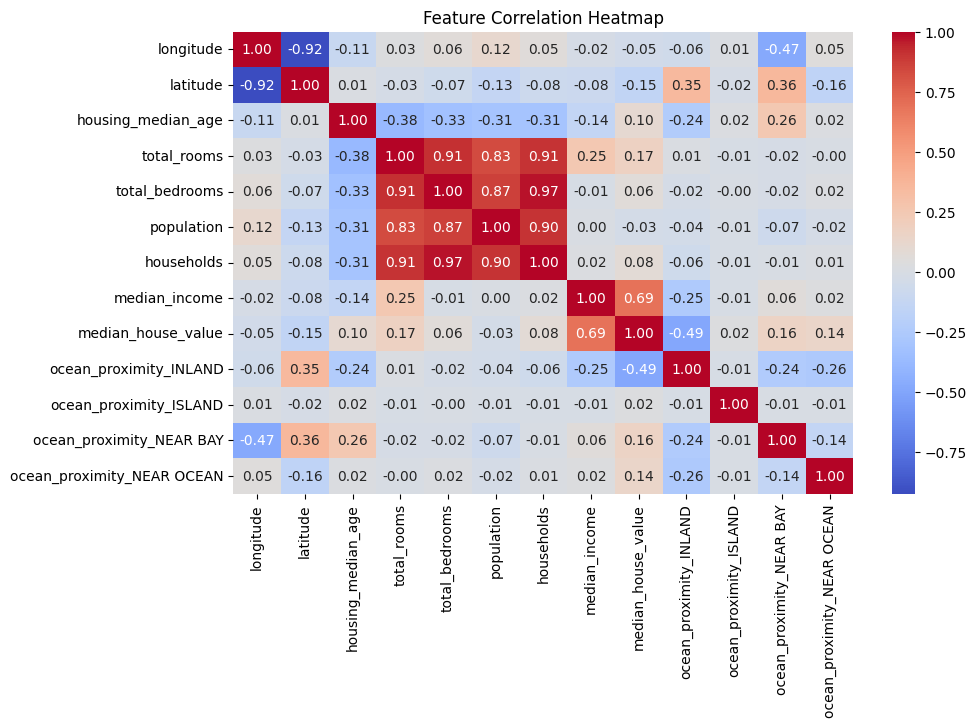

In [14]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Compute correlation of all features with median_house_value
correlation_values = df.corr()["median_house_value"].sort_values(ascending=False)

# Print the top correlated features
print("Feature Correlation with Target (median_house_value):")
print(correlation_values)


Feature Correlation with Target (median_house_value):
median_house_value            1.000000
median_income                 0.689654
total_rooms                   0.173622
ocean_proximity_NEAR BAY      0.161112
ocean_proximity_NEAR OCEAN    0.142420
housing_median_age            0.104423
households                    0.080980
total_bedrooms                0.062042
ocean_proximity_ISLAND        0.023987
population                   -0.030735
longitude                    -0.046311
latitude                     -0.145494
ocean_proximity_INLAND       -0.489383
Name: median_house_value, dtype: float64


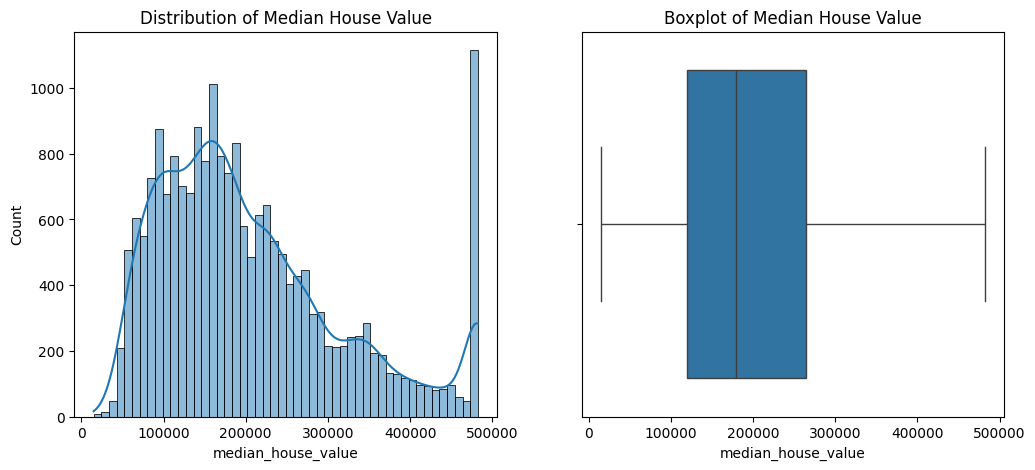

Summary Statistics of Median House Value:
count     20640.000000
mean     205981.224976
std      113217.350152
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      482412.500000
Name: median_house_value, dtype: float64


In [16]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution of Median House Value")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["median_house_value"])
plt.title("Boxplot of Median House Value")

plt.show()


print("Summary Statistics of Median House Value:")
print(df["median_house_value"].describe())


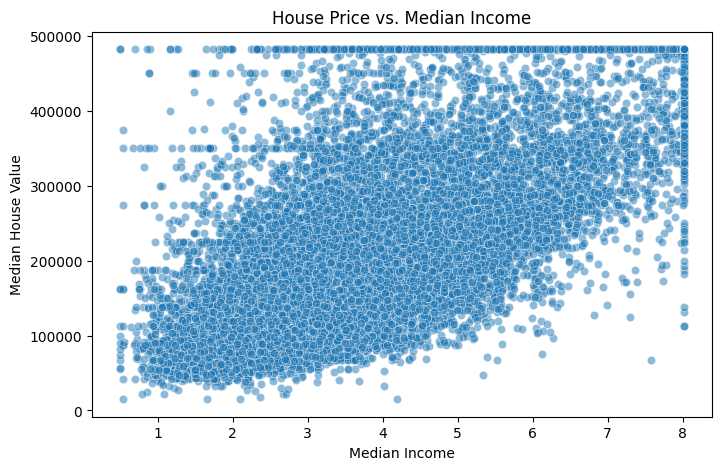

Correlation between Income and House Prices: 0.6896538369633016


In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["median_income"], y=df["median_house_value"], alpha=0.5)
plt.title("House Price vs. Median Income")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


print("Correlation between Income and House Prices:", df["median_income"].corr(df["median_house_value"]))


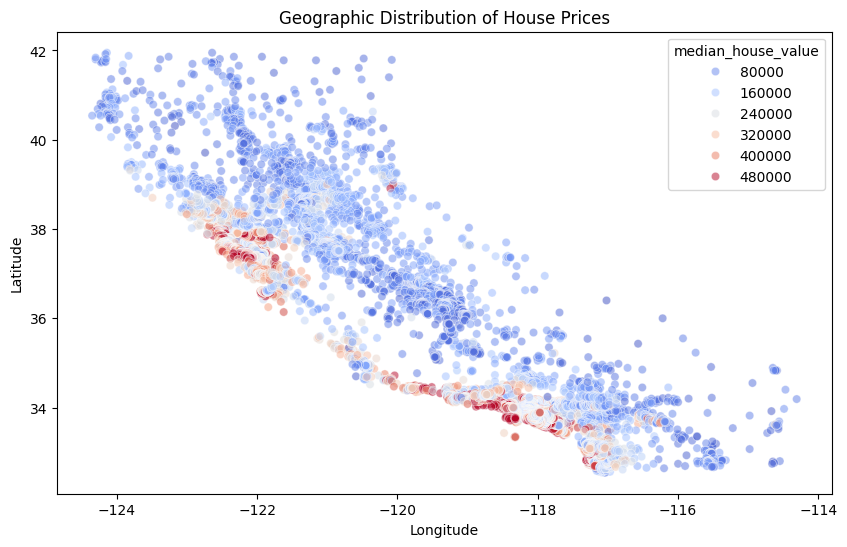

Longitude range: -124.35 to -114.31
Latitude range: 32.54 to 41.95
House Value Statistics by Location:
longitude  latitude
-124.35    40.54        94600.0
-124.30    41.80        85800.0
           41.84       103600.0
-124.27    40.69        79000.0
-124.26    40.58       111400.0
-124.25    40.28        76100.0
-124.23    40.54       106700.0
           40.81        50800.0
           41.75        73200.0
-124.22    41.73        78300.0
Name: median_house_value, dtype: float64


In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["median_house_value"], palette="coolwarm", alpha=0.5)
plt.title("Geographic Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


print("Longitude range:", df["longitude"].min(), "to", df["longitude"].max())
print("Latitude range:", df["latitude"].min(), "to", df["latitude"].max())
print("House Value Statistics by Location:")
print(df.groupby(["longitude", "latitude"])["median_house_value"].mean().head(10))


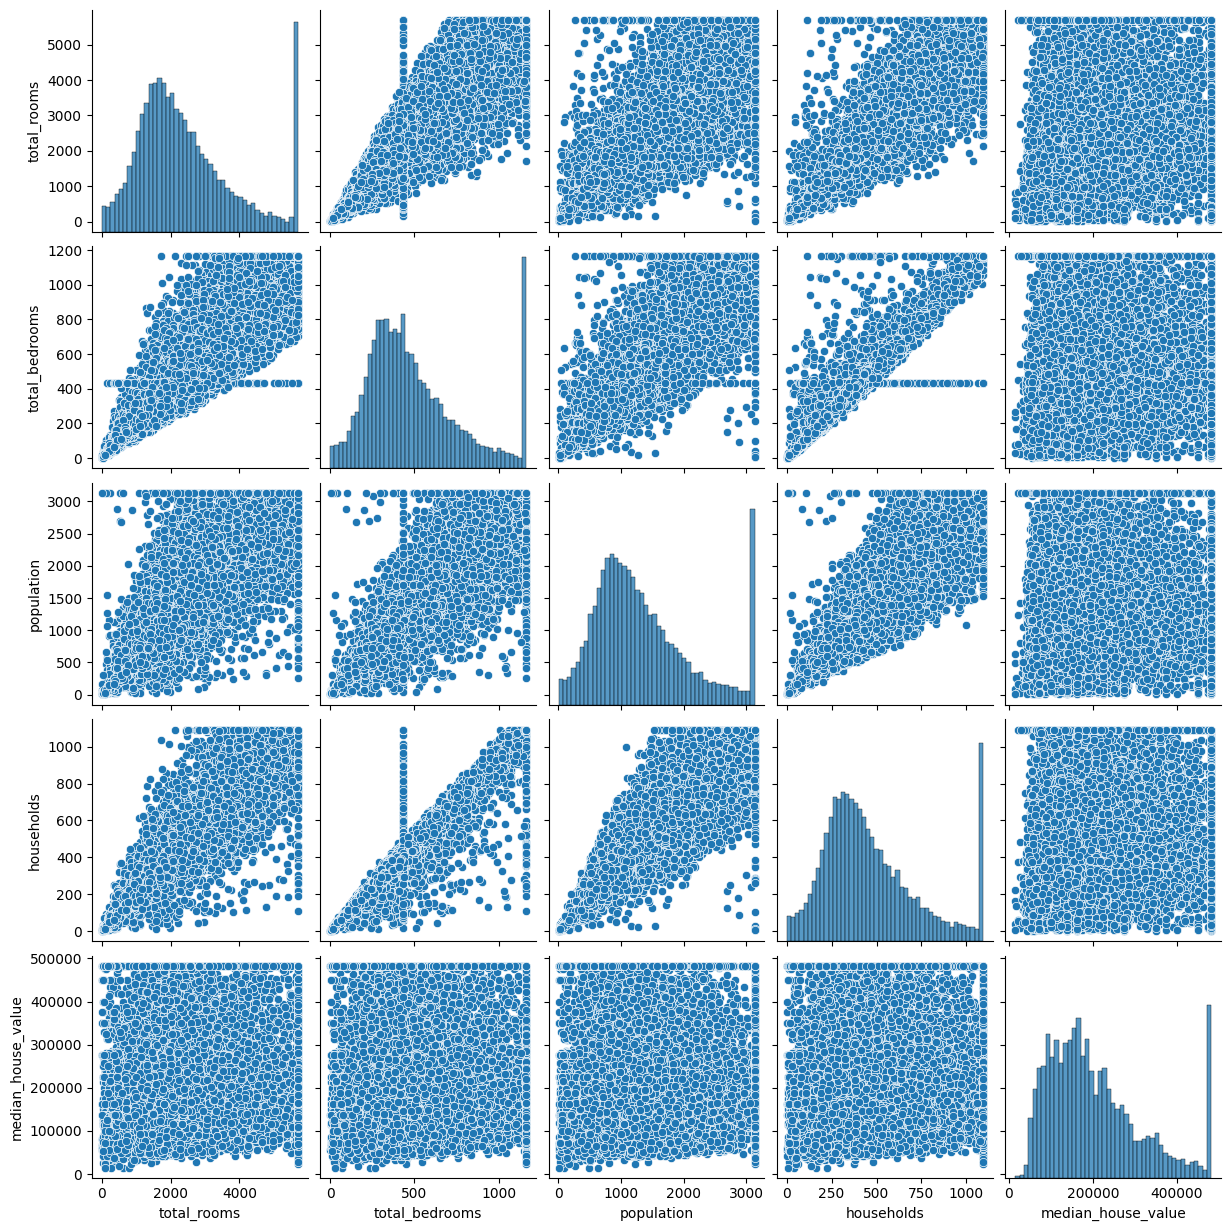

Correlation of Total Rooms & House Price: 0.17362213010953073
Correlation of Total Bedrooms & House Price: 0.0620424238187393
Correlation of Population & House Price: -0.030735412296761987


In [19]:
sns.pairplot(df[["total_rooms", "total_bedrooms", "population", "households", "median_house_value"]])
plt.show()


print("Correlation of Total Rooms & House Price:", df["total_rooms"].corr(df["median_house_value"]))
print("Correlation of Total Bedrooms & House Price:", df["total_bedrooms"].corr(df["median_house_value"]))
print("Correlation of Population & House Price:", df["population"].corr(df["median_house_value"]))


In [20]:
df.shape

(20640, 13)

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0,0,1,0


# Part 2: Model Training & Evaluation

In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["median_house_value"])  # Features
y = df["median_house_value"]  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 16512 rows
Testing set size: 4128 rows


In [23]:
#linear Regression

from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


In [24]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


In [26]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [27]:
# Evaluate each model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)


In [28]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Model: Linear Regression
MAE: 50416.43
RMSE: 68400.35
R² Score: 0.6300
----------------------------------------
Model: Decision Tree
MAE: 42515.82
RMSE: 66858.77
R² Score: 0.6465
----------------------------------------
Model: Random Forest
MAE: 31213.16
RMSE: 47790.58
R² Score: 0.8194
----------------------------------------
Model: XGBoost
MAE: 31650.10
RMSE: 47424.98
R² Score: 0.8221
----------------------------------------


model evaluation results show that Random Forest and XGBoost are performing significantly better than Linear Regression and Decision Tree in terms of RMSE and R² score.

# Part 3: Saving Model and trying Deployment

In [29]:
import pickle

# Save the model
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump


In [33]:
import pickle

# Save the best model (XGBoost)
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print(" Model saved successfully as best_xgb_model.pkl")


✅ Model saved successfully as best_xgb_model.pkl


In [35]:
import requests

# Define API endpoint
url = "http://127.0.0.1:8000/predict"

# Define input data for prediction
data = {
    "longitude": -122.23,
    "latitude": 37.88,
    "housing_median_age": 41.0,
    "total_rooms": 880.0,
    "total_bedrooms": 129.0,
    "population": 322.0,
    "households": 126.0,
    "median_income": 8.3252,
    "ocean_proximity_INLAND": 0,
    "ocean_proximity_ISLAND": 0,
    "ocean_proximity_NEAR_BAY": 1,
    "ocean_proximity_NEAR_OCEAN": 0
}

# Send POST request
response = requests.post(url, json=data)

# Print response
print(response.json())


{'predicted_price': 460487.3125}
